## Problem 3 part c: Expectation Maximization Implementation

### Read Data
In the cell below, we read in the data into the variable X and standardize it. We print the number of rows and columns in the data.

In [1]:
# allow inline plots
%matplotlib notebook

# importing necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# reading in the CSV data
X = pd.read_csv('ClusterSet1.txt', delim_whitespace = True)
X = StandardScaler().fit_transform(X)

print('rows = ' + str(X.shape[0]) + ', cols =  ' + str(X.shape[1]))

rows = 999, cols =  3


###  Testing EM With Varying Number Of Mixture Components (clusters)

<IPython.core.display.Javascript object>


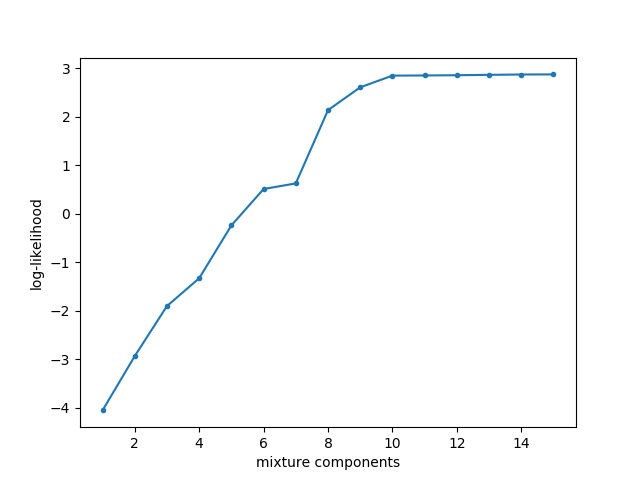

In [18]:
from sklearn.mixture import GaussianMixture

comps_vals = list(range(1, 16))
LLs = []

for comps in comps_vals:
    model = GaussianMixture(n_components = comps, n_init = 10)
    model.fit(X)
    LLs.append(model.lower_bound_)
    
ax = plt.subplots()[1]
ax.set_xlabel('mixture components'); ax.set_ylabel('log-likelihood')
ax.plot(comps_vals, LLs, marker = '.')

### Finalizing number clusters

From the plot above, we see the log-likelihood flattens out after 10, which is the number of clusters we will use for the EM algorithm

<IPython.core.display.Javascript object>


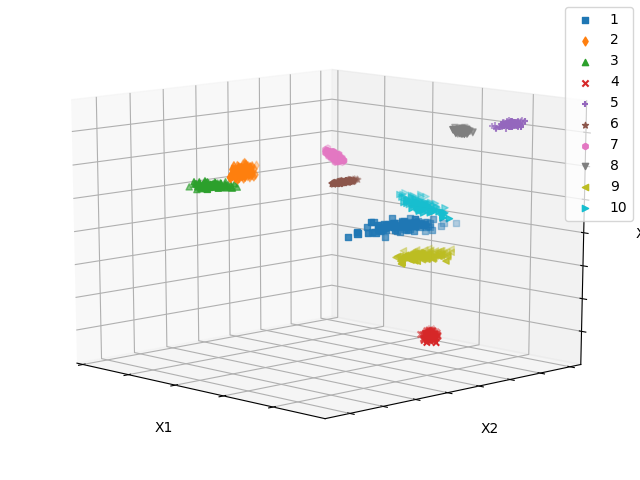

In [37]:
n_clusters = 10

model = GaussianMixture(n_components = n_clusters, n_init = 10)
model.fit(X)
labels = model.predict(X) + 1

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
markers_list = ['o', 's', 'd', '^', 'x', '+', '*', 'h', 'v', '<', '>'
                , '1', '2', '3', '4', '8', 'H', 'D', 'p', '|', 'o', '_', ',']

ax = Axes3D(plt.figure())
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('X1'); ax.set_ylabel('X2'); ax.set_zlabel('X3')

for label in range(1, n_clusters + 1):
    X_label = X[labels == label]
    ax.scatter(X_label[:,0], X_label[:,1], X_label[:, 2], label = str(label)
               , marker = markers_list[label])
ax.legend()

### Comparison With K-means
Our implementation of the EM algorithm yielded slightly better results than K-means for this dataset. The elbow plot for this algorithm revealed the presence of a 10th cluster that wasn't apparent in the elbow plot for K-means.